# Impacts of Demographic Factors on Math Performance
#### UBC STAT 201 Project Proposal - Group 25

## Introduction

In this project, we will investigate the impacts of several demographic factors on secondary school mathematics performance. In particular, we are interested in exploring differences in students' mean final grades in math across different demographic groups including factors like: sex, parent education levels, parent cohabitation status, and family size. 

Previous research has indicated that several of these family/household factors have impacts on general educational outcomes (Marks 2006). Students from single parent households in Finland were found to be at higher risk of educational underachievement, and students from larger families in the USA had less favourable educational outcomes (Riala et al., 2003; Blake, 1989). Parental education levels have also been shown to be predictive of child success later in life (Dubow et al., 2009). In this report, we investigate how these factors may impact mathematical performance specifically.

One area we are especially interested in studying is the relationship between parental education level and student's mathematics grades. We will use inferential statistical techniques (computing confidence intervals using both CLT and bootstrapping) to determine whether there is significant evidence of a difference in mean math grades between students with more/less formally educated parents. The mean and standard deviation of the response variable G3 (final grade in mathematics) will be important when calculating confidence intervals for the difference in means. We consider the sample size to be large enough (395 observations) to apply the CLT in our calculation of confidence intervals.

The data we are using was collected by Paulo Cortez and Alice Silva from secondary schools in Portugal. Their original paper, with detailed explanations of the sampling process can be found [here](https://www.researchgate.net/publication/228780408_Using_data_mining_to_predict_secondary_school_student_performance). The dataset can be downloaded from the UC Irvine Machine learning repository [here](https://archive.ics.uci.edu/dataset/320/student+performance).

**Variables of Interest**
* G3: final grade in mathematics course, numeric [0, 20] (Portugal, France and several other European countries use the 20 point scale)
* famsize: family size, binary [<=3, >3]
* Pstatus: parents cohabitation status, binary [living together, apart]
* sex: student's sex, binary [female, male]
* Medu: mother's education level, factor with 4 levels [0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education]
* Fedu: father's education level, factor with 4 levels (same as Medu)
 


## Preliminary Results

In [45]:
library(tidyverse)
library(dplyr)
library(gridExtra)
library(ggplot2)

In [46]:
students <- read.csv("https://raw.githubusercontent.com/aidanmeharg/STAT_201_Project/main/student-mat.csv", sep = ";")

head(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [41]:
# check for missing values
students %>%
    summarize(num_rows_na = sum(rowSums(is.na(.)) > 0))

num_rows_na
<int>
0


There are no missing values in the dataset.

Dataset after selecting for variables of interest:

In [5]:
filtered_for_coi <- students |>
                        select(G3, famsize, Pstatus, sex, Medu, Fedu)
head(filtered_for_coi)

,G3,famsize,Pstatus,sex,Medu,Fedu
,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,6,GT3,A,F,4,4
2,6,GT3,T,F,1,1
3,10,LE3,T,F,1,1
4,15,GT3,T,F,4,2
5,10,GT3,T,F,3,3
6,15,LE3,T,M,4,3


mean,sd
<dbl>,<dbl>
10.41519,4.581443


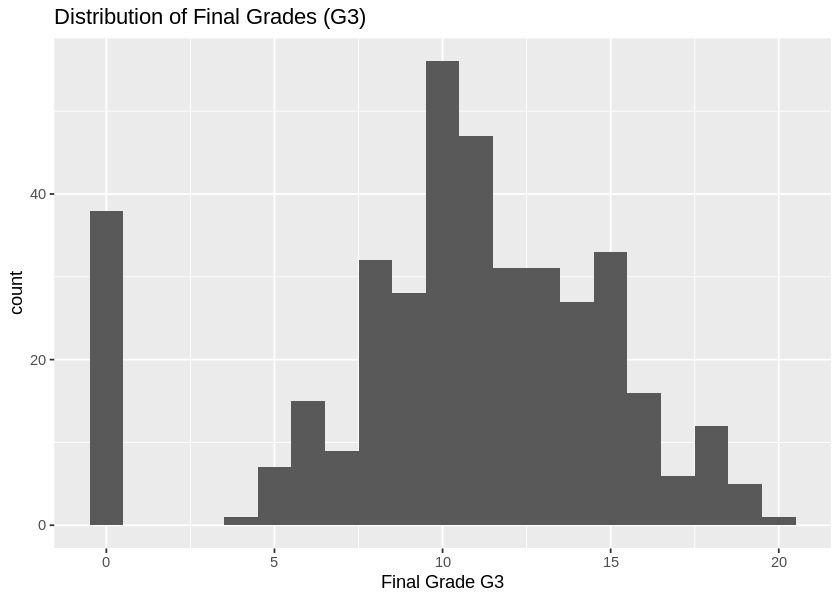

In [42]:
options(repr.plot.height = 5)

ggplot(students, aes(x = G3)) +
    geom_histogram(binwidth = 1) +
    xlab("Final Grade G3") +
    ggtitle("Distribution of Final Grades (G3)")

students |>
    summarize(mean = mean(G3), sd = sd(G3))

This distribution is largely normal and seems to be centered around 10. We note that there are a large number of students who received a final grade of zero. In the future we may decide to drop these observations, as they likely represent a student "dropping-out" of school as opposed to actually performing poorly in assessments. The mean of the students' final grades is 10.42 out of 20, and the standard deviation for this sample is 4.58.

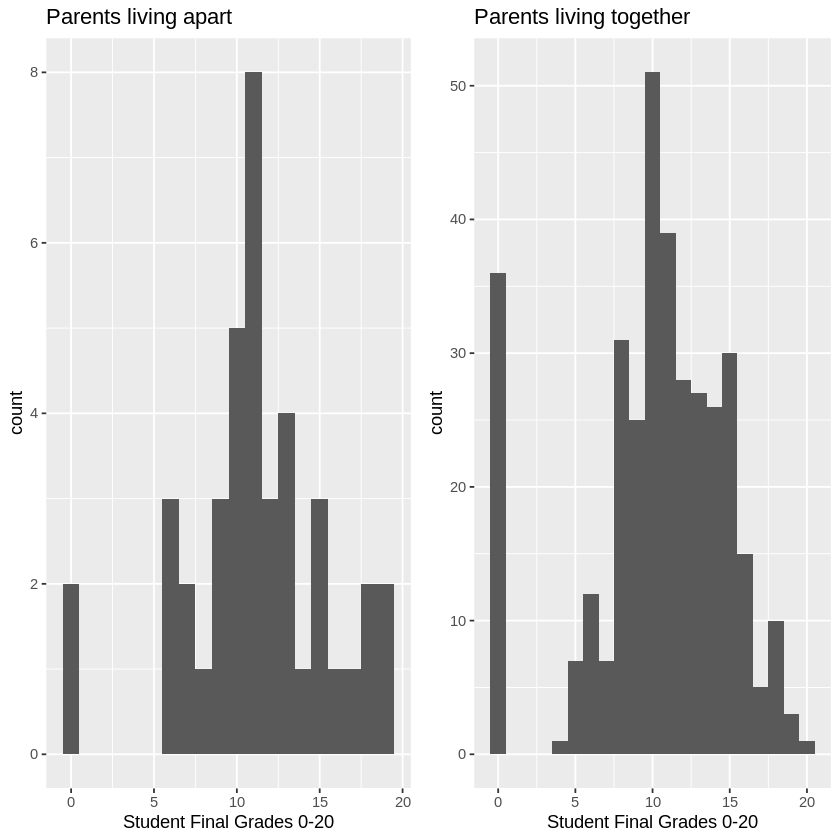

In [20]:
plots_to_Pstatus <- list()

plots_to_Pstatus[[1]] <- students |>
                            filter(Pstatus == "A") |>
                            ggplot() +
                            geom_histogram(aes(x = G3), binwidth = 1) +
                            xlab("Student Final Grades 0-20") +
                            ggtitle("Parents living apart")

plots_to_Pstatus[[2]] <- students |>
                            filter(Pstatus == "T") |>
                            ggplot() +
                            geom_histogram(aes(x = G3), binwidth = 1) +
                            xlab("Student Final Grades 0-20") +
                            ggtitle("Parents living together")

grid.arrange(grobs = plots_to_Pstatus, ncol = 2)

From this graph, it looks as if the mean final grade of students with parents living apart is higher.

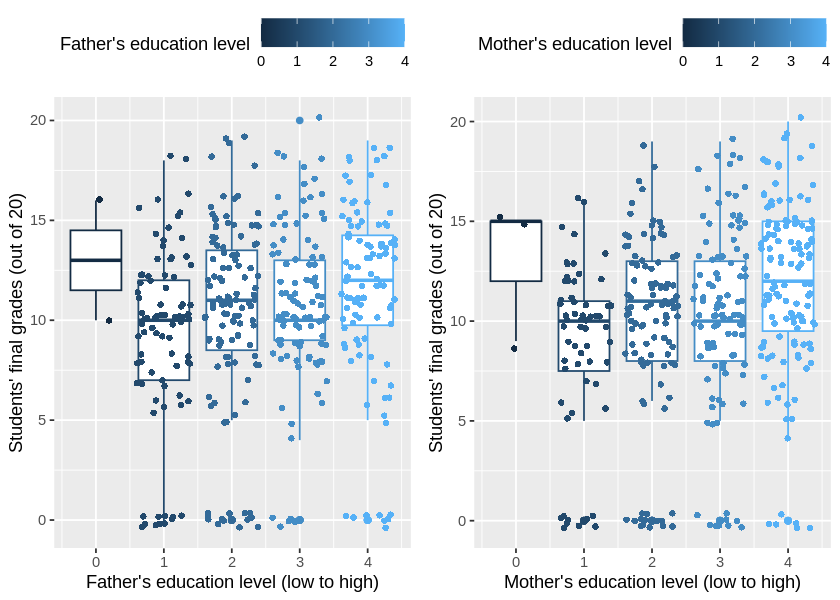

In [62]:
plots_medu_fedu <- list()

plots_medu_fedu[[1]] <- students |>
                            ggplot(aes(x = Fedu, y = G3, group = Fedu, color = Fedu)) +
                            geom_boxplot() +
                            geom_jitter(shape = 16) +
                            theme(legend.position = "top") +
                            xlab("Father's education level (low to high)") +
                            ylab("Students' final grades (out of 20)") +
                            labs(color = "Father's education level")

plots_medu_fedu[[2]] <- students |>
                            ggplot(aes(x = Medu, y = G3, group = Medu, color = Medu)) +
                            geom_boxplot() +
                            geom_jitter(shape = 16) +
                            theme(legend.position = "top") +
                            xlab("Mother's education level (low to high)") +
                            ylab("Students' final grades (out of 20)") +
                            labs(color = "Mother's education level")

grid.arrange(grobs = plots_medu_fedu, ncol = 2)

This graph's interpretation of education levels is as follows
- 0 - no education
- 1 - primary education (4th grade)
- 2 - 5th to 9th grade
- 3 - secondary education
- 4 - higher education

The mean grades of students with fathers and mothers of higher education levels seems to be increasing. 

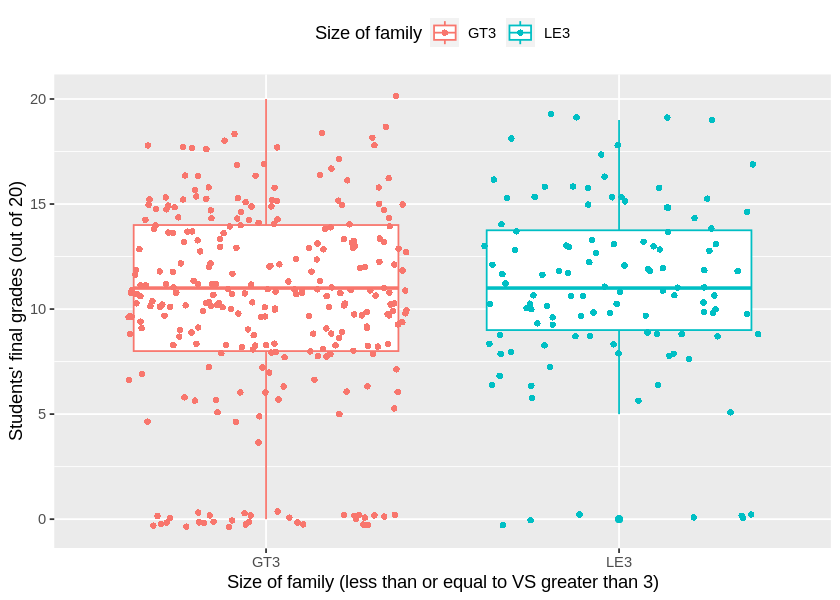

In [63]:
students |>
    ggplot(aes(x = famsize, y = G3, group = famsize, color = famsize)) +
    geom_boxplot() +
    geom_jitter(shape = 16) +
    theme(legend.position = "top") +
    xlab("Size of family (less than or equal to VS greater than 3)") +
    ylab("Students' final grades (out of 20)") +
    labs(color = "Size of family")

This plot shows the distributions of students' final grades relative to whether the size of their family is less than (LE3) or greater than (GT3) three.

There does not seem to be a visible difference in mean grades.

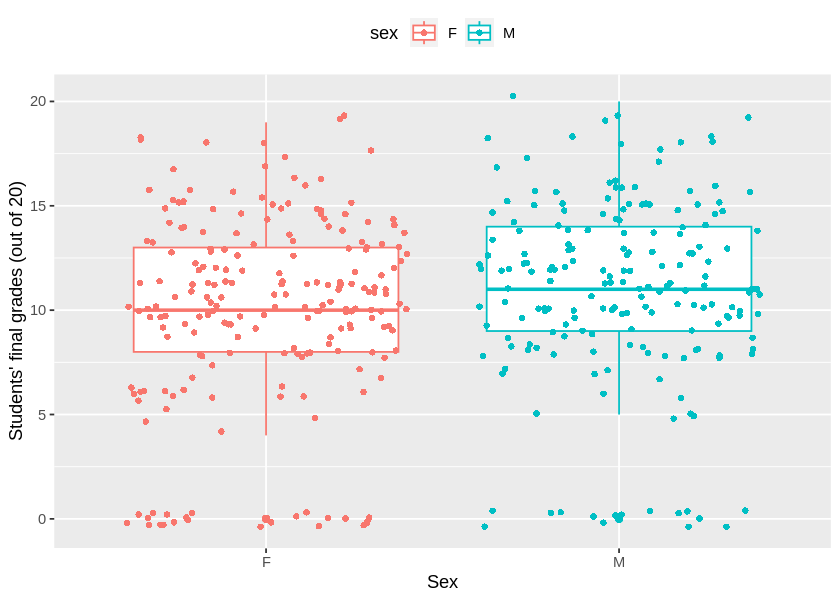

In [60]:
students |>
    ggplot(aes(x = sex, y = G3, group = sex, color = sex)) +
    geom_boxplot() +
    geom_jitter(shape = 16) +
    theme(legend.position = "top") +
    xlab("Sex") +
    ylab("Students' final grades (out of 20)")

According to this plot, boys, on average, have higher final grades than girls.

## Methods

Our report is trustworthy because we use data from a source that has been cited five publications. Because our sample size is so large (395), we will be able to apply the CLT. 

Currently, our plots and estimates aren't enough to give a stakeholder because, while we have been able to visualize differences, we don't have the statistical significance of those differences or how they interact with each other.

To produce reliable results, we would need to perform hypothesis tests and produce a confidence interval. We are interested in how math grades vary depending on the education levels of the students' parents, so our null hypothesis will be $H_0$ = there is no relationship between the mother's education level (Medu) or the father's education level (Fedu) and the students' final math grades (G3). Our alternative hypothesis $H_A$ = there is a positive relationship between Medu or Fedu and G3.

Our expected result is the null hypothesis $H_0$. Finding factors affecting differences in academic performance could allow educators to better acommodate and support these students and their learning, as well as incentivize institutions to allocate resources to help disadvantaged groups.

## References

Blake, J. (1989). Family size and achievement (studies in demography). University of California Press.

Cortez, Paulo & Silva, Alice. (2008). Using data mining to predict secondary school student performance. EUROSIS. 

Dubow, E. F., Boxer, P., &amp; Huesmann, L. R. (2009). Long-term effects of parents’ education on Children’s educational and occupational success: Mediation by family interactions, child aggression, and teenage aspirations. Merrill-Palmer Quarterly, 55(3), 224–249. https://doi.org/10.1353/mpq.0.0030

Marks, G. N. (2006). Family size, family type and student achievement: Cross-national differences and the role of socioeconomic and school factors. Journal of Comparative Family Studies, 37(1), 1–24. https://doi.org/10.3138/jcfs.37.1.1

Riala, K., Isohanni, I., Jokelainen, J., Jones, P. B., &amp; Isohanni, M. (2003). The Relationship between Childhood Family Background and Educational Performance, with Special Reference to Single-parent Families: A Longitudinal Study. Social Psychology of Education, 6(4), 349–365. https://doi.org/10.1023/a:1025608401292 